<a href="https://colab.research.google.com/github/Aaryant31/Bike-Sharing-Demand-Prediction/blob/main/Rahul_Kumar_soni_Notebook_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [624]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [625]:
data='https://raw.githubusercontent.com/Aaryant31/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv'

In [626]:
df = pd.read_csv(data, encoding = "ISO-8859-1")

# Exploratory data analysis 

In [627]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [628]:
df.shape

(8760, 14)

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [630]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [631]:
df['Date']= pd.to_datetime(df['Date'])

In [632]:
# create new day,month, hour info from Pickup time
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

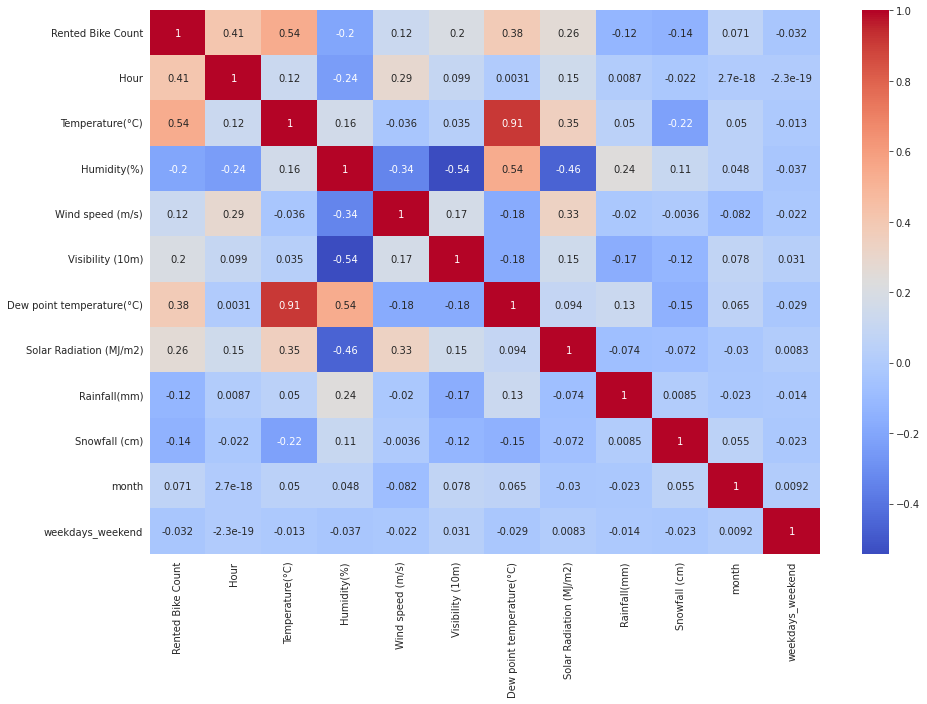

In [633]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [634]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [635]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])


,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


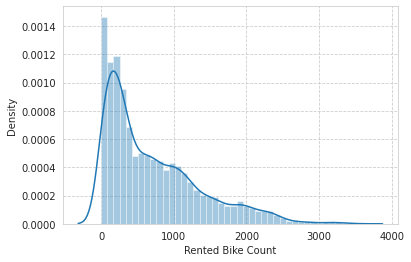

In [636]:
sns.distplot(df['Rented Bike Count'])

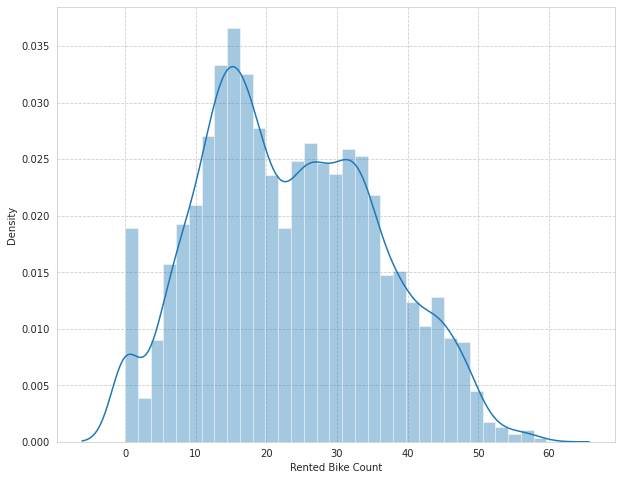

In [637]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [638]:
numeric_features= df.select_dtypes(exclude='object')

In [639]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [640]:
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


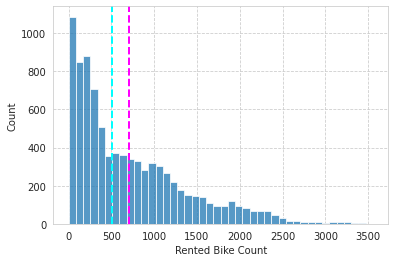

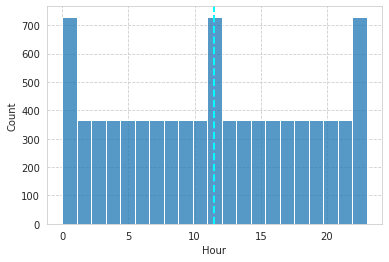

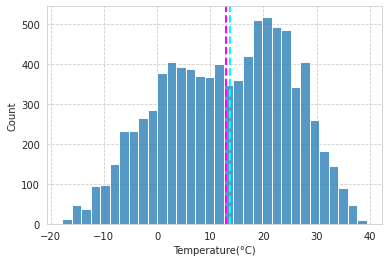

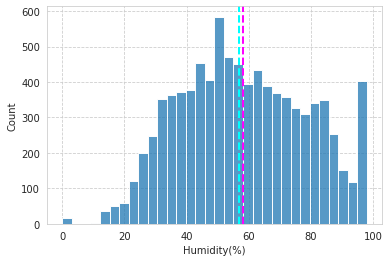

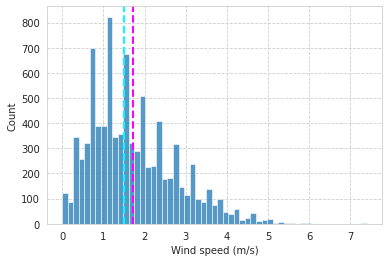

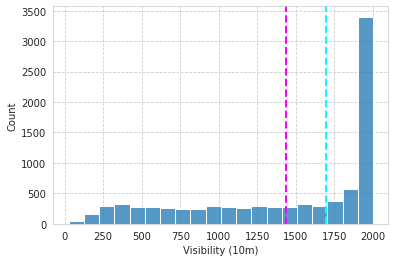

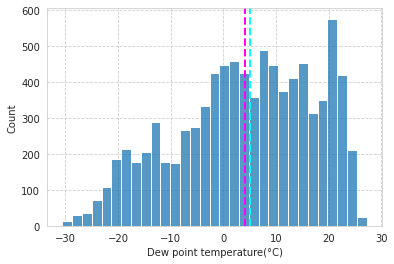

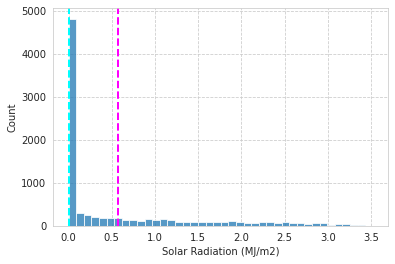

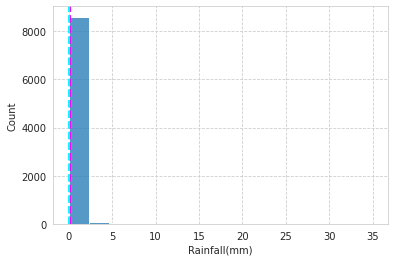

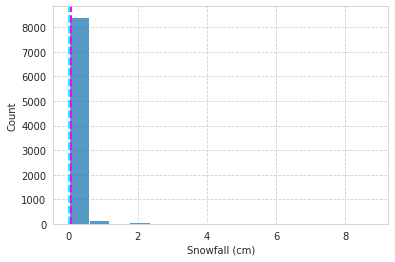

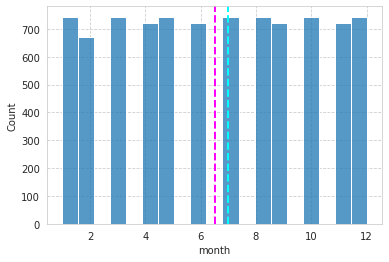

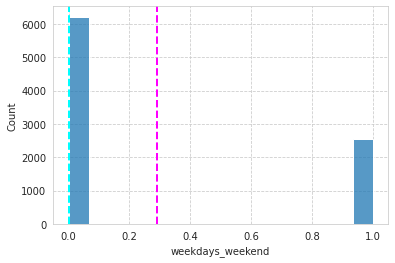

In [641]:
#plotting histogram of dataset
for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

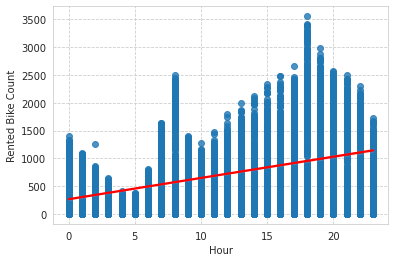

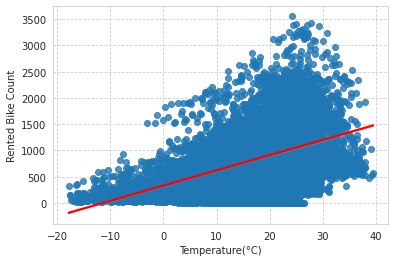

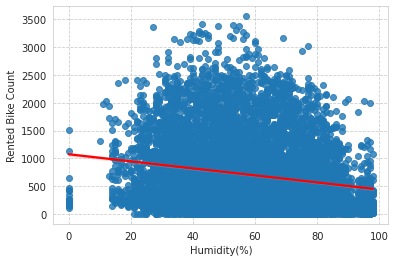

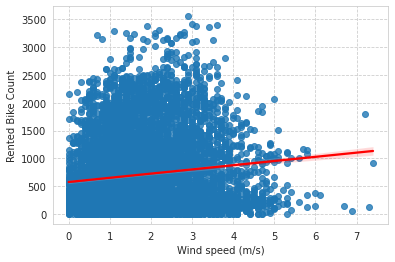

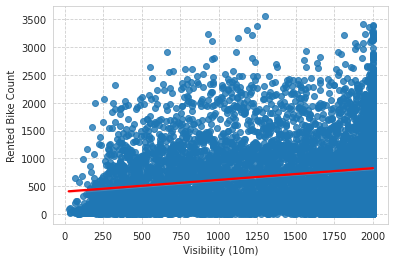

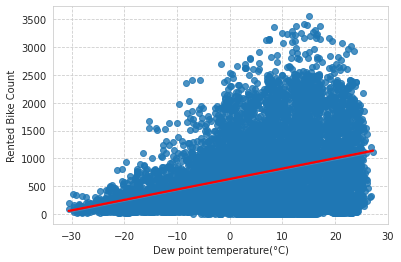

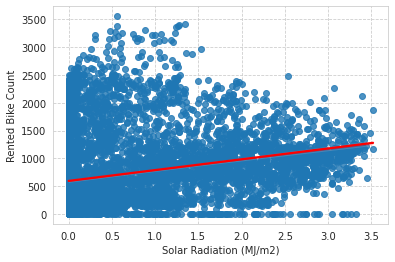

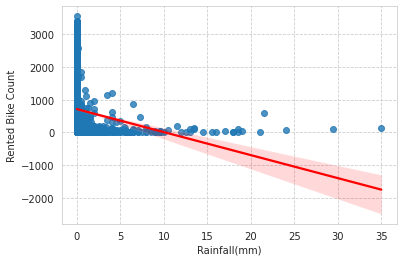

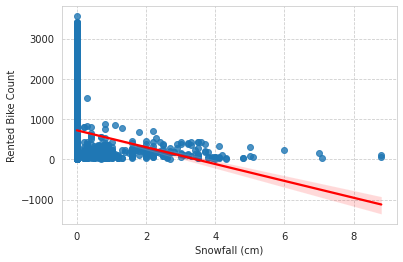

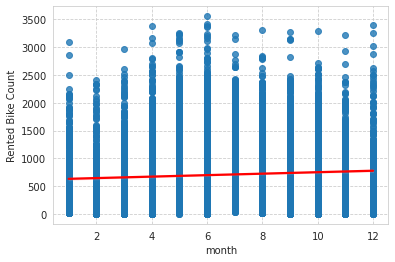

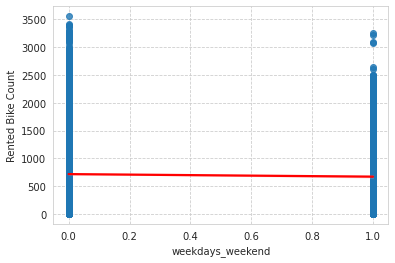

In [642]:
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [643]:
categorical_features= df.select_dtypes(include='object')

In [644]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


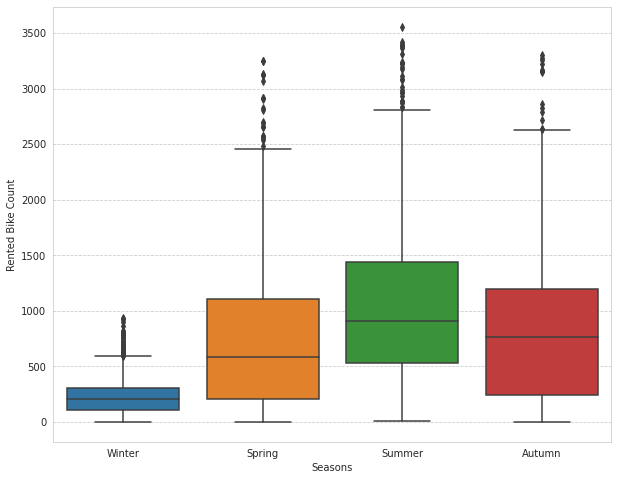

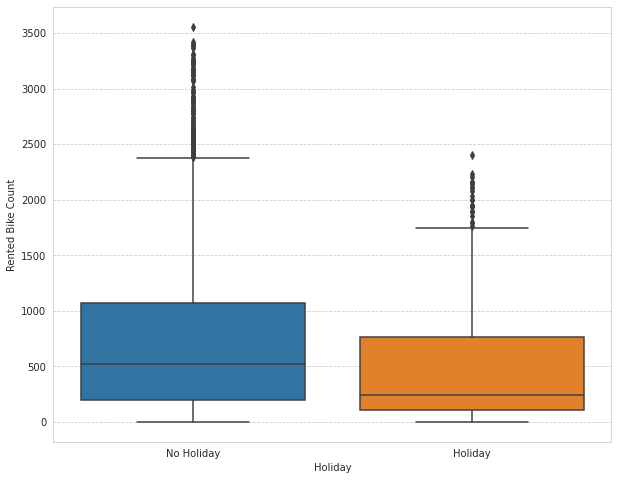

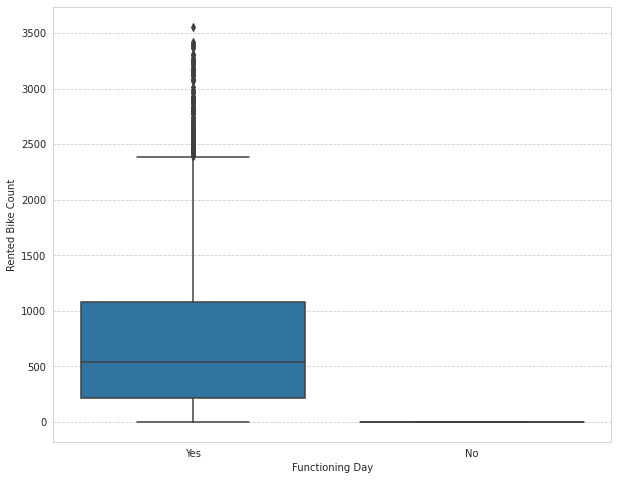

In [645]:
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

## Conclusion
- Less demand on winter seasons
- Sligthly Higher demand during Non holidays
- Almost no demnad on non functioning day 

In [646]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

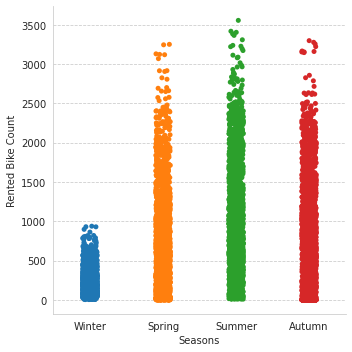

In [647]:
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

# Conclusion

**we can clearly see that there is less demand of rented bike during winter season**

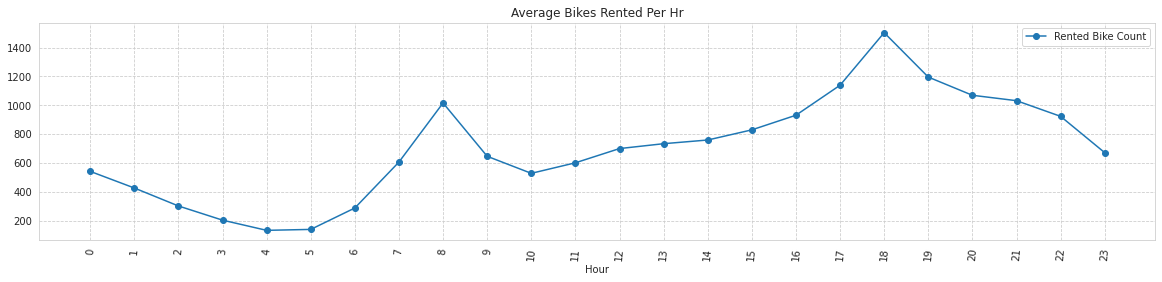

In [648]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);



# Conclusion

- High rise of Rented Bikes from 8:00 a.m to 9:00 p.m
     means people prefer rented bike during rush hour.



- <u>8 bje se pehle koi nhi uthta to bike khaak chalega





In [649]:
categorical_features= df.select_dtypes(include='object')

In [650]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [651]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [652]:
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [653]:
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [654]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


<Figure size 2000x1600 with 0 Axes>

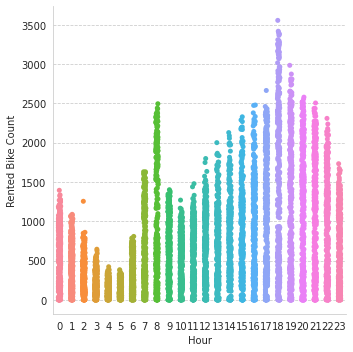

<Figure size 2000x1600 with 0 Axes>

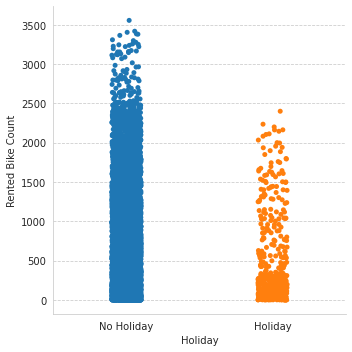

<Figure size 2000x1600 with 0 Axes>

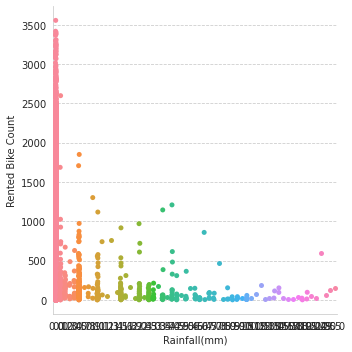

<Figure size 2000x1600 with 0 Axes>

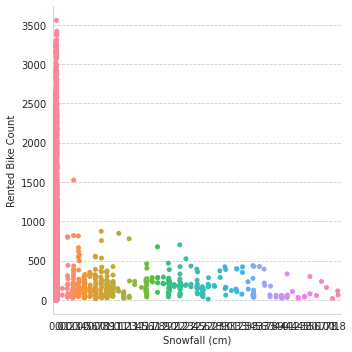

<Figure size 2000x1600 with 0 Axes>

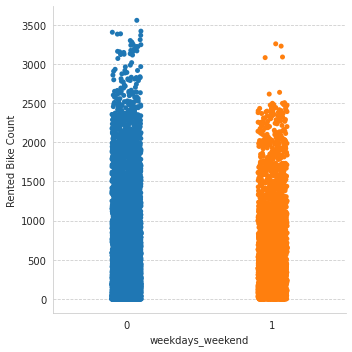

In [655]:
feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

# Conclusion

**From hour v/s rented bike**
- we can clearly see there is high demand of Rented bike between the office hours.

**From working-nonworking v/s rented bike**

- As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

**From Rainfall v/s rented bike**

- we can see that if Rainfall increase demand of Rented Bike Decreases


**From Snowfall v/s rented bike**

- we can see that if Snowfall increase demand of Rented Bike Decreases

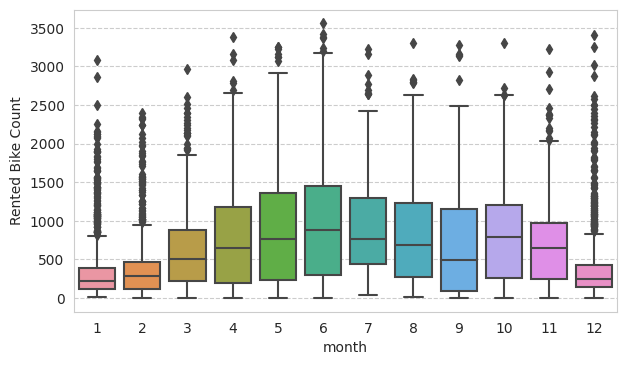

In [656]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

# Conclusion:

- we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

- Also demand of bike is maximum during May,june,july i.e Summer seasons

# Linear Regresseion

In [657]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [658]:
X.shape

(8760, 16)

In [659]:
y=np.sqrt(final_df['Rented Bike Count'])

In [660]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [661]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [662]:
# appying linearRegression
from sklearn.linear_model import LinearRegression

In [663]:
linear_model= LinearRegression()

In [664]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [665]:
y_pred=linear_model.predict(X_test)

 # Evaluation Matrix Linear Regression

In [666]:
import math
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
MSE  = mean_squared_error(y_test**2,y_pred**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)




r2 = r2_score(y_test**2,y_pred**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test**2,y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 175590.55287332062
RMSE : 419.035264474627
R2 : 0.5729108337712393
Adjusted R2 :  0.5697661367350404


In [667]:
mean_squared_error(y_test**2,y_pred**2)

175590.55287332062

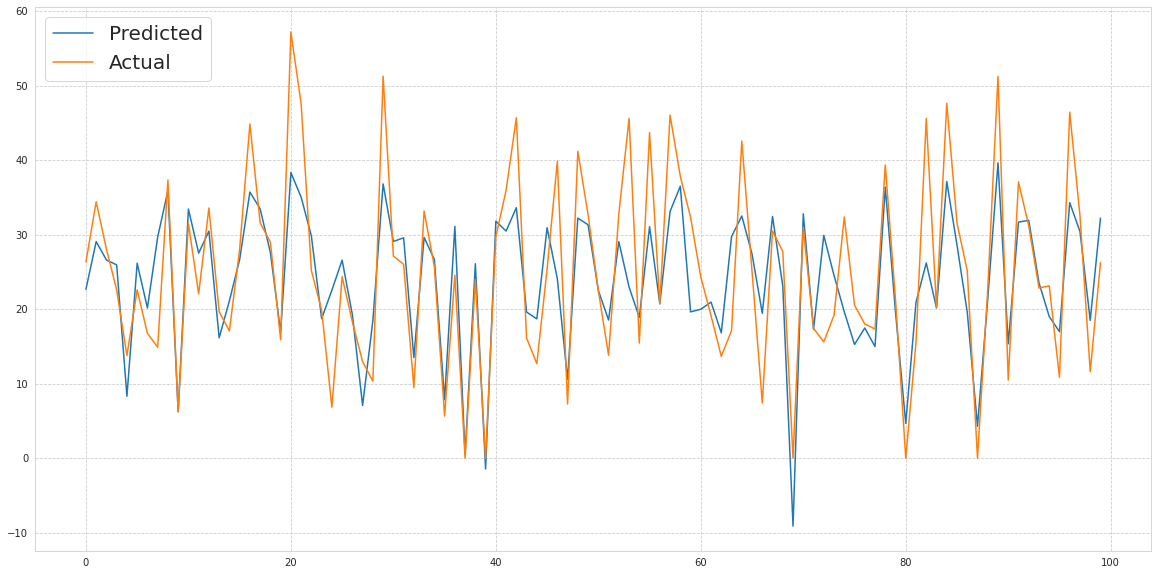

In [668]:
train_class_preds = linear_model.predict(X_train)
test_class_preds= linear_model.predict(X_test)


plt.figure(figsize=(20,10))
plt.plot(test_class_preds[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

MSE : 52.616692193396645
RMSE : 7.253736429826813
R2 : 0.656511133757308
Adjusted R2 :  0.6539819934628381


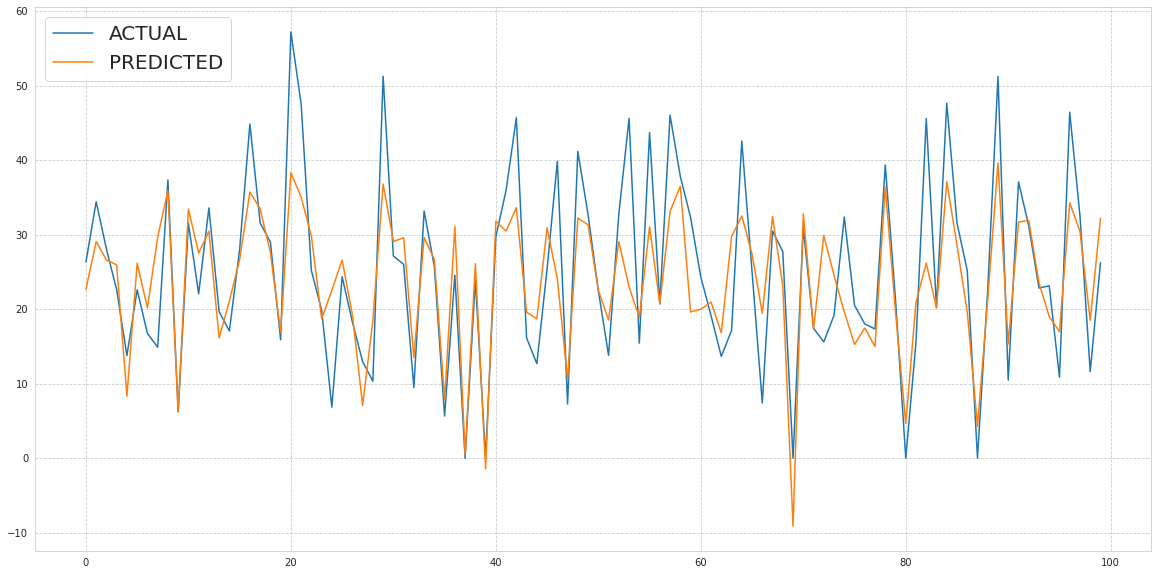

In [669]:
run_model(linear_model,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [670]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [671]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [672]:
pipe.fit(X_train,y_train)

poly_preds=pipe.predict(X_test)

# Evaluation Matrix

In [673]:
MSE  = mean_squared_error(y_test**2,poly_preds**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test**2,poly_preds**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test**2,poly_preds**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 123952.86032808443
RMSE : 352.0693970342842
R2 : 0.6985092711258545
Adjusted R2 :  0.6962893670016086


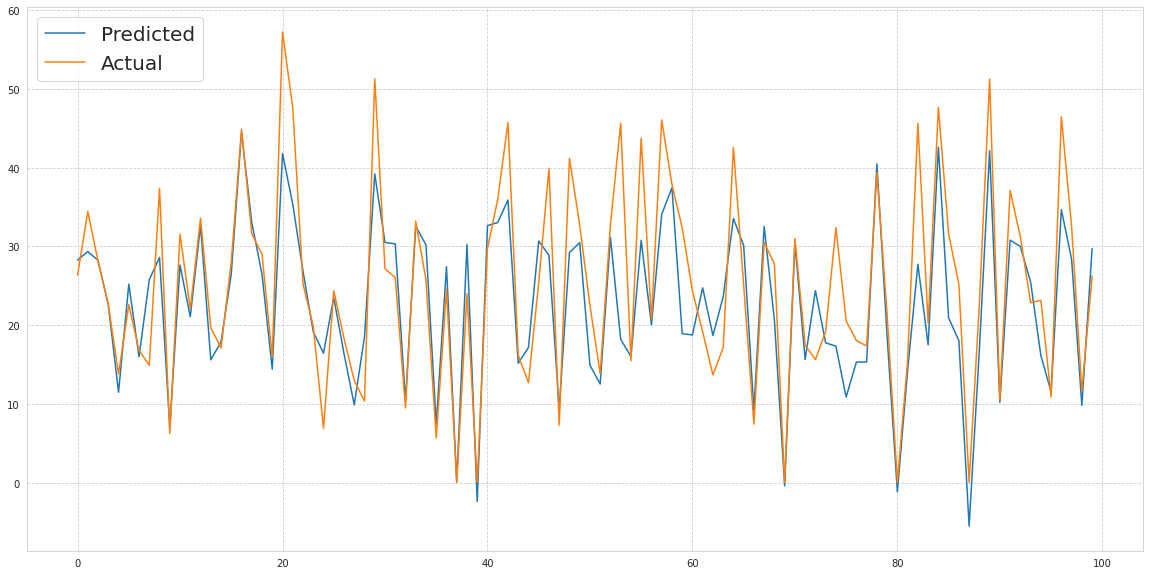

In [674]:
train_class_preds = pipe.predict(X_train)
test_class_preds= pipe.predict(X_test)


plt.figure(figsize=(20,10))
plt.plot(test_class_preds[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

# Creating Function to train linear models and calculate scores

In [675]:
# making a function to train the model and evaluate the model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  print("Adjusted R2 : ",1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    # ploting the line graph of actual and predicted values  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

# Regularisation

## Lasso Regression

In [676]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

MSE : 175577.18339525422
RMSE : 419.01931148248315
R2 : 0.5729433523728773
Adjusted R2 :  0.5697988947741502


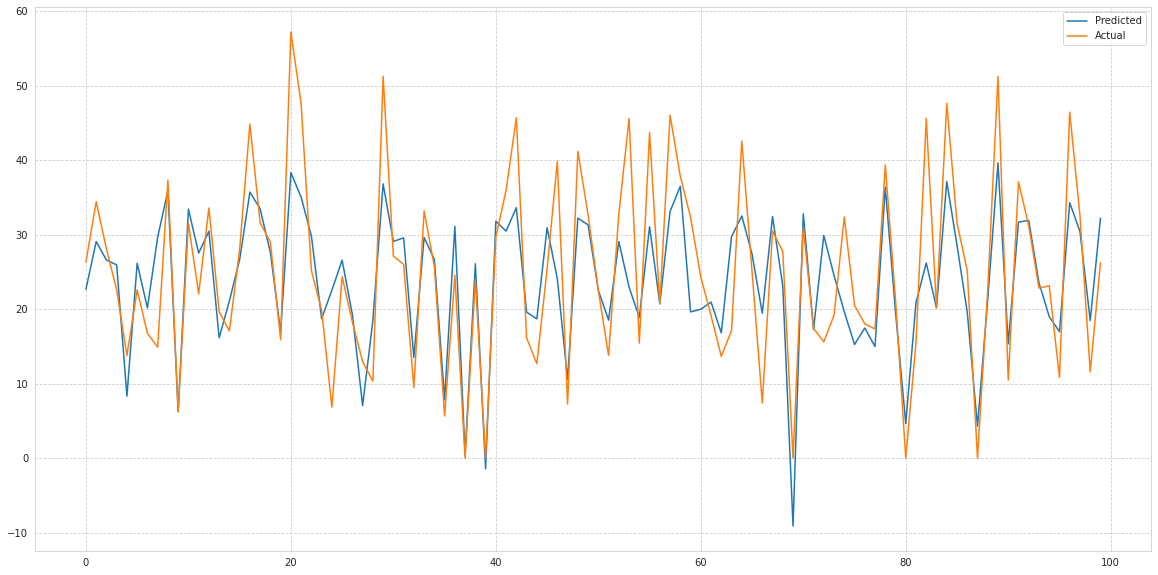

In [677]:
train_linear_model(lasso,X_train,y_train,X_test,y_test)

In [678]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
#setting the parameters of the 
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856


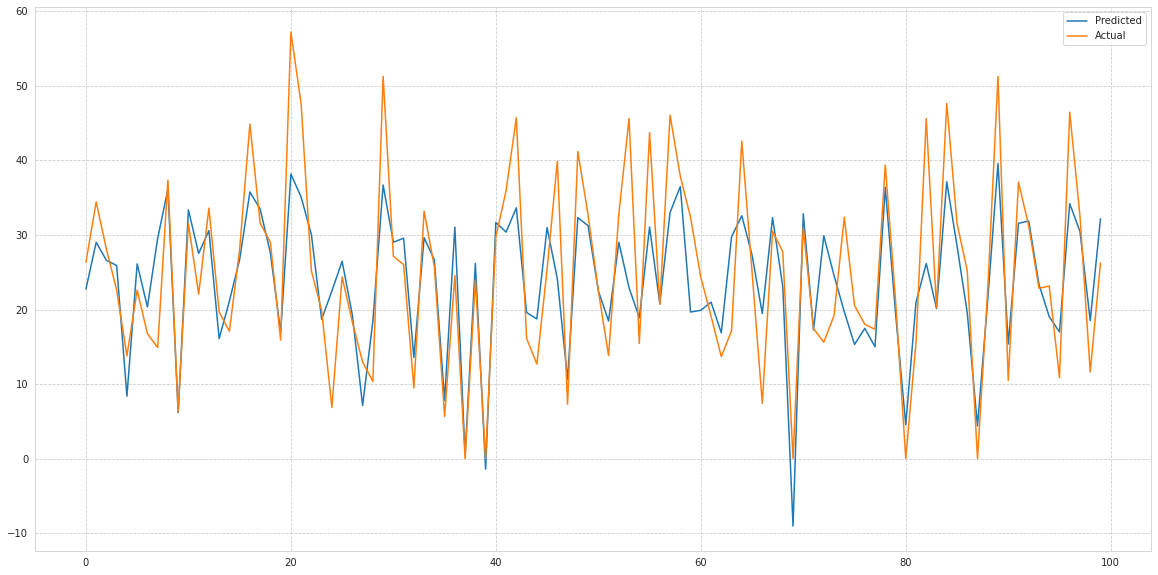

In [679]:
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##Ridge Regression

In [680]:
# importing the Lasso regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
# finding the best parameters for ridge by gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443


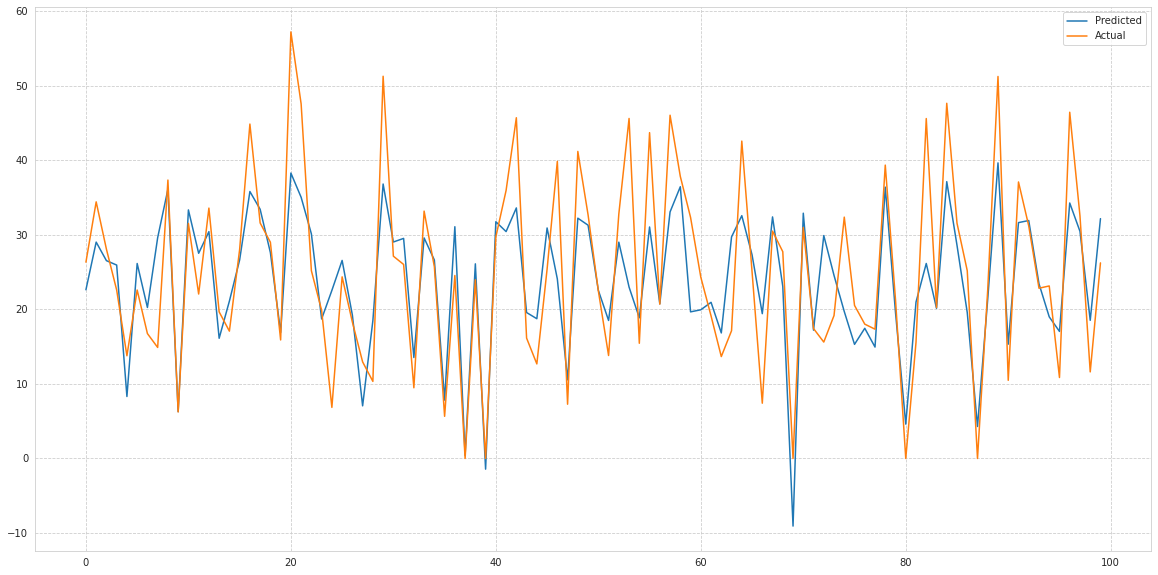

In [681]:
train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

## ElasticNet Regression

In [682]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

MSE : 180463.13600525432
RMSE : 424.8095290895136
R2 : 0.5610592424803386
Adjusted R2 :  0.5578272810812062


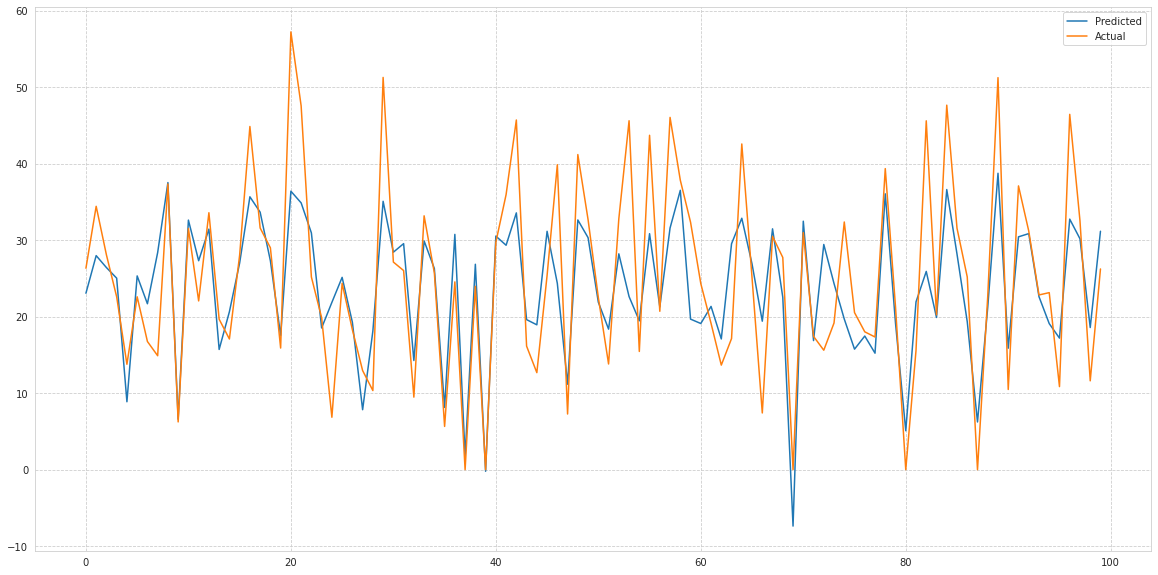

In [683]:
train_linear_model(elasticnet,X_train,y_train,X_test,y_test)

# KNN and Tree Based Method

# Train | Test split Data

In [684]:
X=final_df.drop(['Rented Bike Count'],axis=1)

In [685]:
y=final_df['Rented Bike Count']

In [686]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#creating function to run diffirent model

In [687]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    print("Adjusted R2 : ",1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

    train_class_preds = linear_model.predict(X_train)

    #ploting 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

# KNN Regression


In [688]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [689]:
knn_model = KNeighborsRegressor()

In [690]:
n_neighbors=[5,9,11,15]
param_dict={'n_neighbors':n_neighbors}

In [691]:
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

MSE : 197374.53888824835
RMSE : 444.268543662781
R2 : 0.5232858697675166
Adjusted R2 :  0.5206319288893955


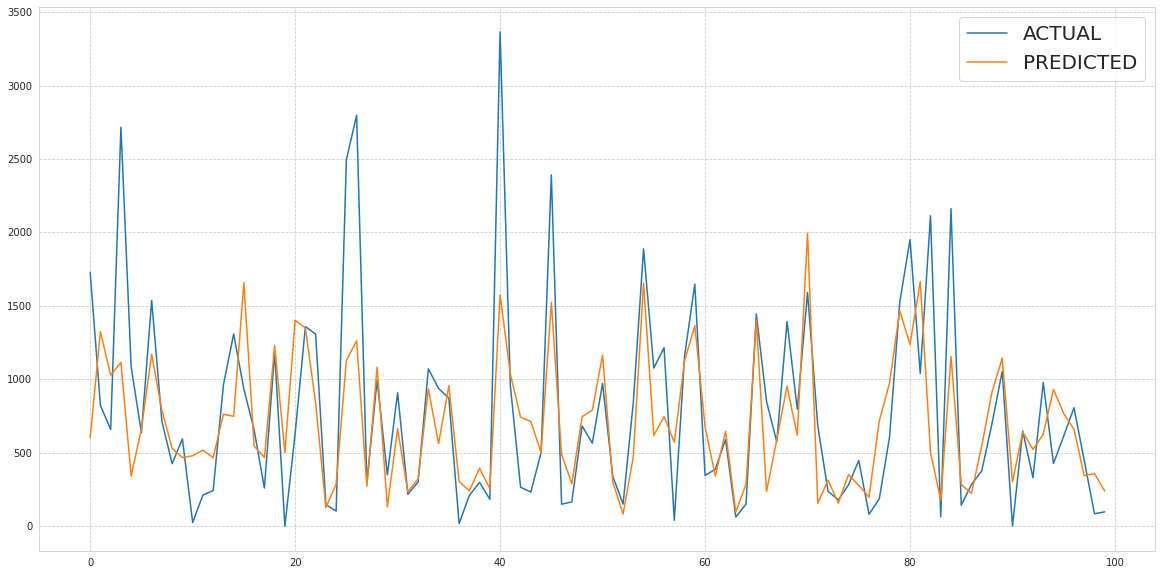

In [692]:
run_model(knn_grid,X_train,y_train,X_test,y_test)

In [693]:
knn_grid.best_params_

{'n_neighbors': 9}

# Decision Tree Regression

In [694]:
from sklearn.tree import DecisionTreeRegressor

MSE : 97518.37737806987
RMSE : 312.279325889611
R2 : 0.7644661326869978
Adjusted R2 :  0.7631548794242949


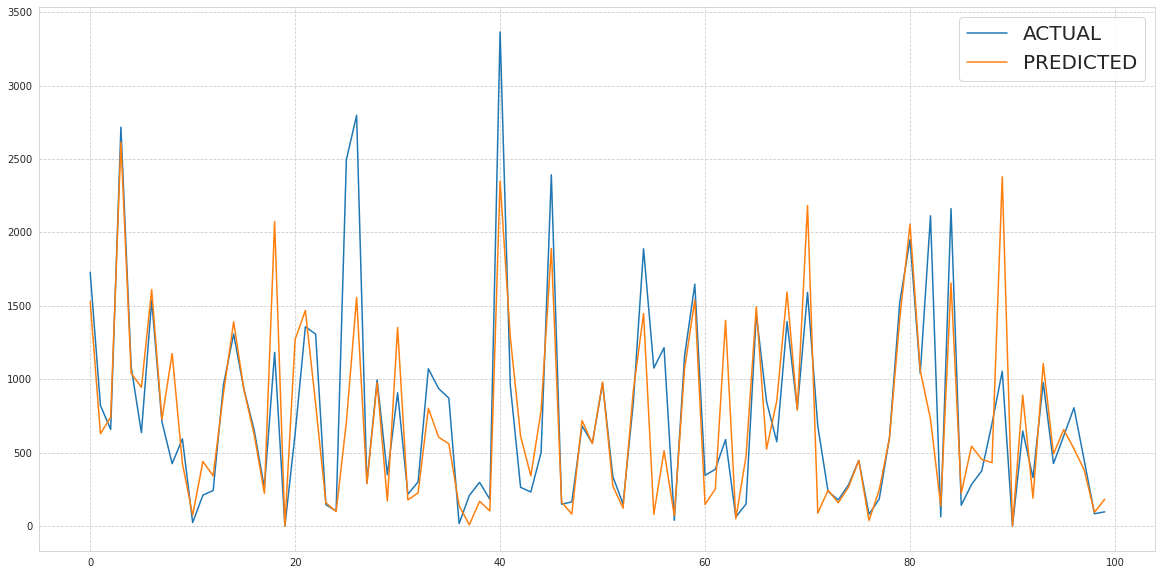

In [695]:
dt_model = DecisionTreeRegressor()

run_model(dt_model,X_train,y_train,X_test,y_test)

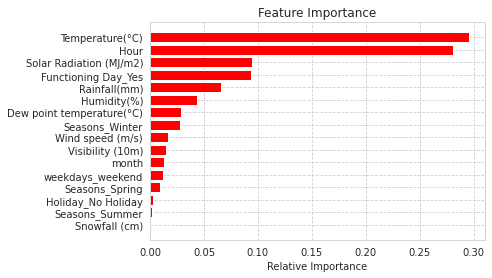

In [696]:
get_features_importance(dt_model,X_train)

# Random Forest

In [697]:
from sklearn.ensemble import RandomForestRegressor

In [698]:
rf_model = RandomForestRegressor()


In [699]:
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
# n_estimators=[80,100,150]
# max_depth=[15,20,30]
# max_leaf_nodes=[40,60,80]
# params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [700]:
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

MSE : 62841.249920676426
RMSE : 250.68157076394033
R2 : 0.8482209915858553
Adjusted R2 :  0.8473760145035218


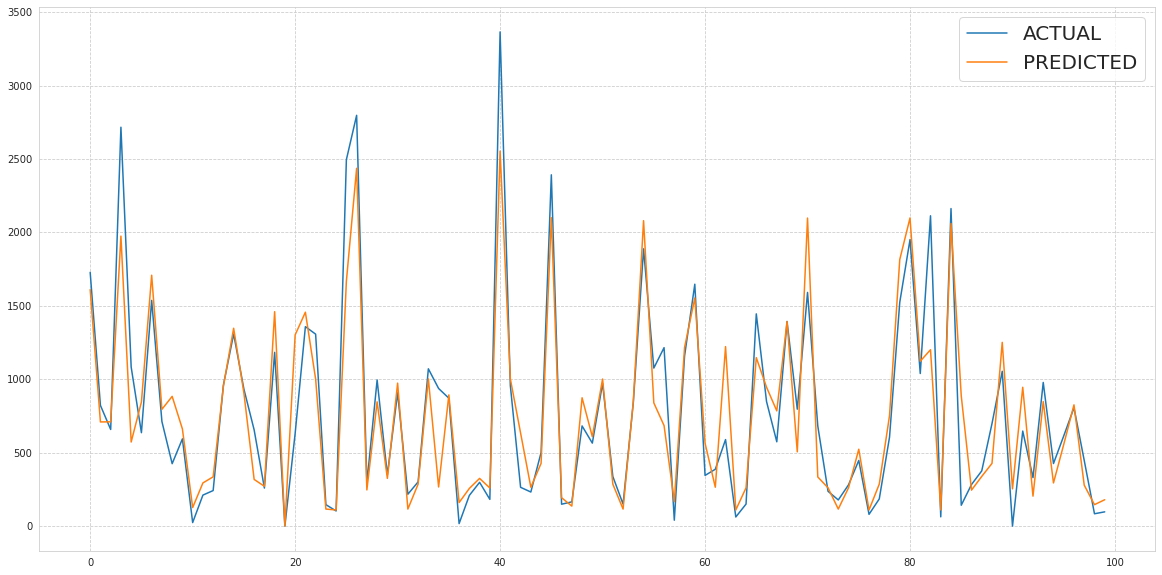

In [701]:
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [702]:
rf_grid.best_params_

{'max_depth': 20, 'max_leaf_nodes': 80, 'n_estimators': 80}

In [703]:
optimal_rf_model=rf_grid.best_estimator_

In [704]:
optimal_rf_model.feature_importances_

array([6.09041257e-03, 9.38527776e-04, 2.19350068e-02, 1.13927568e-03,
       9.84611328e-02, 2.98157412e-01, 3.32721918e-01, 7.77701022e-02,
       3.52536478e-03, 4.31831995e-03, 2.07046080e-02, 8.55504519e-02,
       3.46635163e-02, 5.53491011e-05, 5.26744197e-03, 8.70116058e-03])

# creating function to get feature importance 

In [705]:
def get_features_importance(optimal_model,X_train):
    feature_importance= optimal_model.feature_importances_
    features = X_train.columns
    indices = np.argsort(feature_importance)
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), feature_importance[indices], color='red', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')

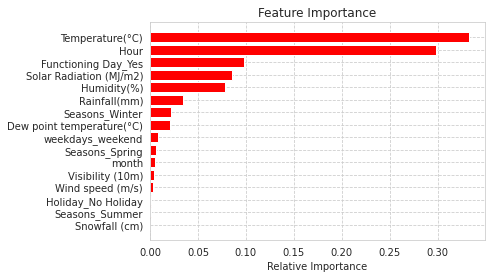

In [706]:
get_features_importance(optimal_rf_model,X_train)

# Gradient Boosting

In [707]:
from sklearn.ensemble import GradientBoostingRegressor

In [708]:
gb_model=GradientBoostingRegressor()

In [709]:
gb_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [710]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [711]:
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)

MSE : 61660.519607219336
RMSE : 248.31536321222524
R2 : 0.8510727820325324
Adjusted R2 :  0.8502436813062


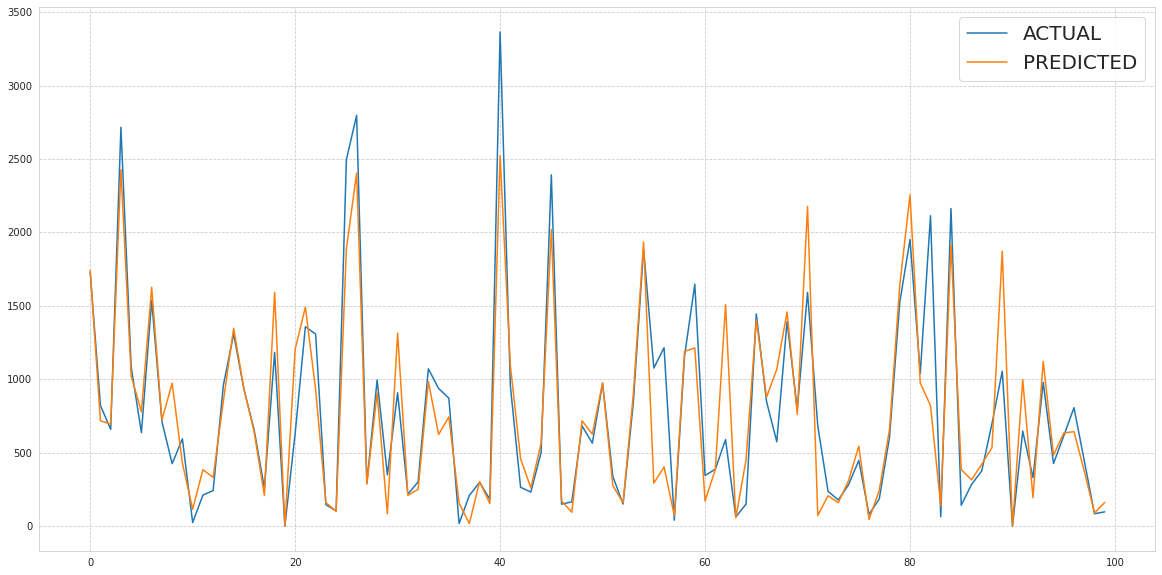

In [712]:
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [713]:
optimal_gb_model=gb_grid.best_estimator_

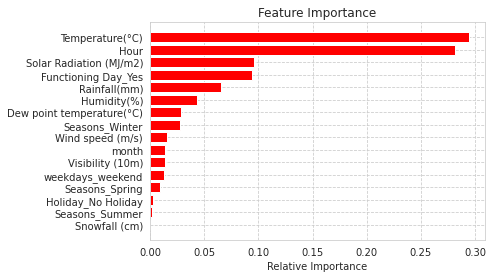

In [714]:
get_features_importance(optimal_gb_model,X_train)

# Xtreme Gradient Boosting

In [715]:
from xgboost import XGBRegressor

In [716]:
xgb_model=XGBRegressor()

In [717]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [718]:
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [719]:
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[13:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

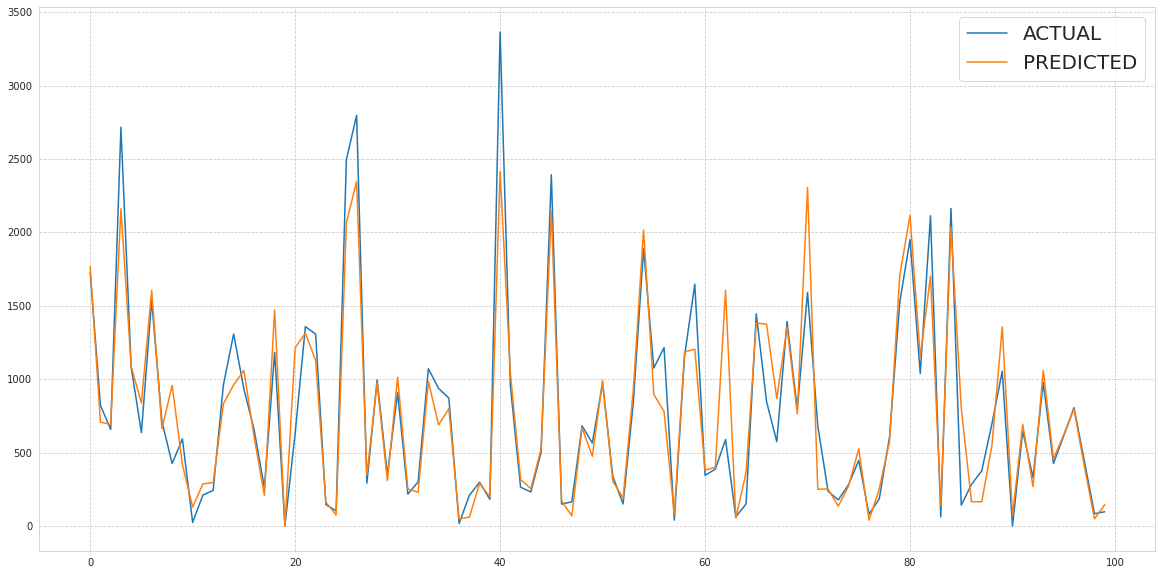

In [720]:
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [721]:
optimal_xgb_model=xgb_grid.best_estimator_

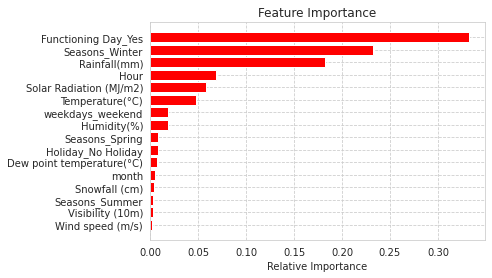

In [722]:
get_features_importance(optimal_xgb_model,X_train)

# CatBoost

In [723]:
from catboost import CatBoostRegressor

In [724]:
cb_model=CatBoostRegressor(verbose=0)

MSE : 36719.192452710595
RMSE : 191.62252595326729
R2 : 0.9113129890434144
Adjusted R2 :  0.910819254814011


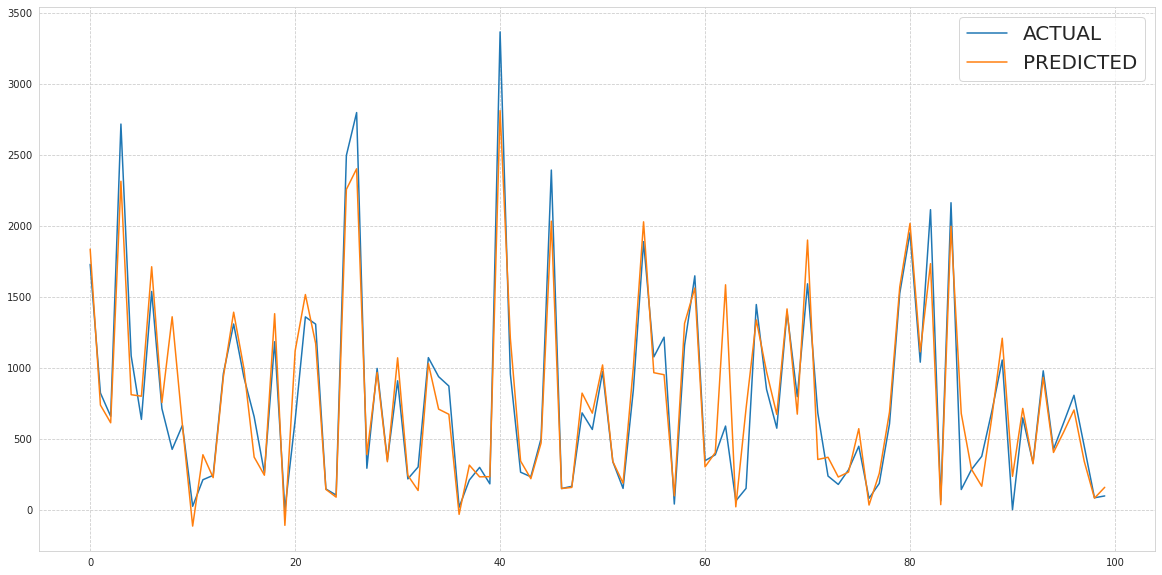

In [726]:
run_model(cb_model,X_train,y_train,X_test,y_test)

In [727]:
cb_model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.05348199978470802,
 'loss_function': 'RMSE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample': 0.800000011920929,

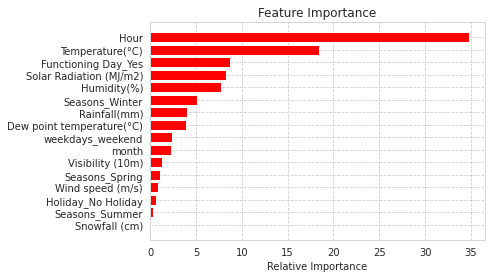

In [728]:
get_features_importance(cb_model,X_train)